<h1><center>NTU Undergraduate Population by Gender from 2016 - 2020

## Team Members
    1. Leng Wei Shao, Sean
    2. Lim Zhen Lun, Bryan    
<strong>Class</strong>: 24th May 2020, 7pm

## Data Source
   1. [Undergraduate Population by Gender AY 2019-20](https://www.ntu.edu.sg/AboutNTU/CorporateInfo/FactsFigures/Pages/Undergraduate-Population-for-AY2019-20.aspx)
   2. [Undergraduate Population by Gender AY2018-19](https://www.ntu.edu.sg/AboutNTU/CorporateInfo/FactsFigures/Pages/Undergraduate-Population-by-Gender-AY2018-19.aspx)
   3. [Undergraduate Population by Gender AY2017-18](https://www.ntu.edu.sg/AboutNTU/CorporateInfo/FactsFigures/Pages/Undergraduate-Population-by-Gender-AY2017-18.aspx)
   4. [Undergraduate Population by Gender AY2016-17](https://www.ntu.edu.sg/AboutNTU/CorporateInfo/FactsFigures/Pages/Undergraduate-Population-by-Gender-AY2016-17.aspx)
   5. [Undergraduate Population by Gender AY2015-16](https://www.ntu.edu.sg/AboutNTU/CorporateInfo/FactsFigures/Pages/Undergraduate-Population%20by%20Gender-for-AY2015-16.aspx)
   6. [Undergraduate Population by Gender AY2014-15](https://www.ntu.edu.sg/AboutNTU/CorporateInfo/FactsFigures/Pages/Undergraduate-Population-by-Gender-AY2014-15.aspx)
   7. [Undergraduate Population by Gender AY2013-14](https://www.ntu.edu.sg/ABOUTNTU/CORPORATEINFO/FACTSFIGURES/Pages/UndergraduatePopulationbyGenderAY2013-14.aspx)
   8. [Undergraduate Population by Gender AY2012-13](https://www.ntu.edu.sg/AboutNTU/CorporateInfo/FactsFigures/Pages/UndergraduatePopulationbyGenderAY2012-13.aspx)
   
<strong>Explaination</strong>: Data consists of male, female and total values for all full-time courses

## Executive Summary

In this project, the population of NTU from 2012 to 2019 was compiled and analysed. Data cleaning was carried out on the compiled data with, programme, male, female, total student, and year in each column. A line graph was created for each gender against year to understand the gender demographics and trend throughout the 8 years. Various graphs such as student (separated by gender) by programmes was also plotted via bar graphs for ease of visualising data, deducing and analysing certain trends. The prediction of student population by gender was also done via line regression and an assessment of the model’s performance using the r2 score to calculate the R2 score of the model. The R2 value is a gauge for the accuracy of the prediction. Finally, the optimal K elbow plot was created to determine the optimal value of K.

## Introduction

Have you ever wondered why the population of guys is always more than the population of girls for engineering courses? Are the arts courses on the decline with recent news stating that arts and design are the top non-essential jobs? Have you wondered which are the courses to join where there is much higher girl to guy ratio? We have the answers for you.

In our project, we dive into the student population for the last 8 years to find how the demographics differ across all courses offered by NTU. As a small island nation, Singapore universities have climbed the ranks in world university rankings has been a great feat. As such, universities such as NTU have a diverse spectrum of courses offered that will appeal to all students, local and international. Thus the student population/cohorts history of NTU can be used to analyse for male to female ratio and percentages in order to estimate trends that can be representative of the international student community due to the large proportion of overseas students.

## Importing relevant packages

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests 
import warnings
from bs4 import BeautifulSoup

warnings.filterwarnings('ignore')

## Scrapping for Data and saving to CSV

In [2]:
data_source = {
    "2019": "https://www.ntu.edu.sg/AboutNTU/CorporateInfo/FactsFigures/Pages/Undergraduate-Population-for-AY2019-20.aspx",
    "2018": "https://www.ntu.edu.sg/AboutNTU/CorporateInfo/FactsFigures/Pages/Undergraduate-Population-by-Gender-AY2018-19.aspx",
    "2017": "https://www.ntu.edu.sg/AboutNTU/CorporateInfo/FactsFigures/Pages/Undergraduate-Population-by-Gender-AY2017-18.aspx",
    "2016": "https://www.ntu.edu.sg/AboutNTU/CorporateInfo/FactsFigures/Pages/Undergraduate-Population-by-Gender-AY2016-17.aspx",
    "2015": "https://www.ntu.edu.sg/AboutNTU/CorporateInfo/FactsFigures/Pages/Undergraduate-Population%20by%20Gender-for-AY2015-16.aspx",
    "2014": "https://www.ntu.edu.sg/AboutNTU/CorporateInfo/FactsFigures/Pages/Undergraduate-Population-by-Gender-AY2014-15.aspx",
    "2013": "https://www.ntu.edu.sg/ABOUTNTU/CORPORATEINFO/FACTSFIGURES/Pages/UndergraduatePopulationbyGenderAY2013-14.aspx",
    "2012": "https://www.ntu.edu.sg/AboutNTU/CorporateInfo/FactsFigures/Pages/UndergraduatePopulationbyGenderAY2012-13.aspx"
}

def scrape_website(url, year):
    scraped_data = {
        "programme": [],
        "male": [],
        "female": [],
        "total": [],
        "year": ""
    }
    
    website_url = requests.get(url).text
    soup = BeautifulSoup(website_url, "html")

    table = soup.find("table", {"class": "ms-rteTable-1"})
    table_row = table.find_all("tr")

    for i in table_row[2:-1]:        
        all_data = i.find_all("td")
        
        if len(all_data) > 0:
            datas = [datas.text for datas in all_data]
            
            scraped_data["programme"].append(re.sub('[*^\u200b,\n]', '', datas[0]))
            scraped_data["male"].append(re.sub('[*^\u200b,\n]', '', datas[1]))
            scraped_data["female"].append(re.sub('[*^\u200b,\n]', '', datas[2]))
            scraped_data["total"].append(re.sub('[*^\u200b,\n]', '', datas[3]))
            scraped_data["year"] = year
                
    return scraped_data
            
dataframes = []

for year, url in data_source.items():
    df = pd.DataFrame(scrape_website(url, year))
    
    try:
        dataframes.append(pd.read_csv("{0}.csv".format(year)))
    except:
        df.to_csv("{0}.csv".format(year), index=False)
    dataframes.append(pd.read_csv("{0}.csv".format(year)))

### Combining Dataframes

In [3]:
result = pd.concat(dataframes)
result.head()

programme  male  female  total  year
0                          Accountancy   675     739   1414  2019
1             Accountancy and Business   320     331    651  2019
2                   Art Design & Media   167     479    646  2019
3                Aerospace Engineering   382      80    462  2019
4  Aerospace Engineering and Economics    22       5     27  2019

### Cleaning Data

In [4]:
result_df = result

def convert_int(x):
    return int(x)

result_df["male"].apply(convert_int)
result_df["female"].apply(convert_int)
result_df["total"].apply(convert_int)
result_df["year"].apply(lambda x: str(x))

0     2019
1     2019
2     2019
3     2019
4     2019
      ... 
41    2012
42    2012
43    2012
44    2012
45    2012
Name: year, Length: 876, dtype: object

### Total Students by Year

In [5]:
total_students_year = result_df.groupby("year", as_index=False).sum()
total_students_year

year   male  female  total
0  2012  23786   23250  47036
1  2013  23482   23486  46968
2  2014  23782   23644  47426
3  2015  24428   24172  48600
4  2016  24906   23718  48624
5  2017  24884   22622  47506
6  2018  25028   22302  47330
7  2019  25018   22736  47754

### Total Students by Course

In [6]:
total_student_course = result_df[["male", "female", "total", "programme"]].groupby("programme", as_index=False).sum()
total_student_course

programme   male  female  total
0                           Accountancy  10918   13920  24838
1              Accountancy and Business   4652    5764  10416
2                 Aerospace Engineering   5408    1254   6662
3   Aerospace Engineering and Economics    278      74    352
4                    Art Design & Media   3508    7506  11014
..                                  ...    ...     ...    ...
61     Public Policy and Global Affairs   1010    1610   2620
62              Renaissance Engineering   2430    1158   3588
63                   Science(Education)   1626    2484   4110
64                            Sociology   2024    5616   7640
65           Sport Science & Management   2418    2270   4688

[66 rows x 4 columns]

### Plotting of Graph By Gender Per Year

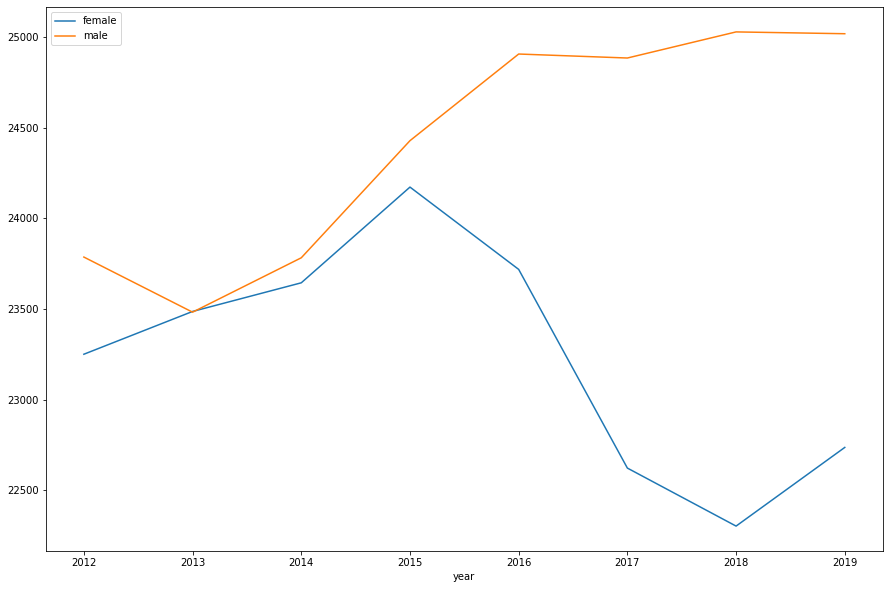

In [7]:
fig, ax = plt.subplots(figsize=(15,10))
total_students_year.plot(kind="line",x="year", y="female", ax=ax)
total_students_year.plot(kind="line",x="year", y="male", ax=ax)

<strong>From this graph, we can see that there are a much lower female intake as compared to male intake throughout the years. This could be due to females becoming more independent and choosing to work instead of studying.</strong>

### Plotting Graph of Student by Programme

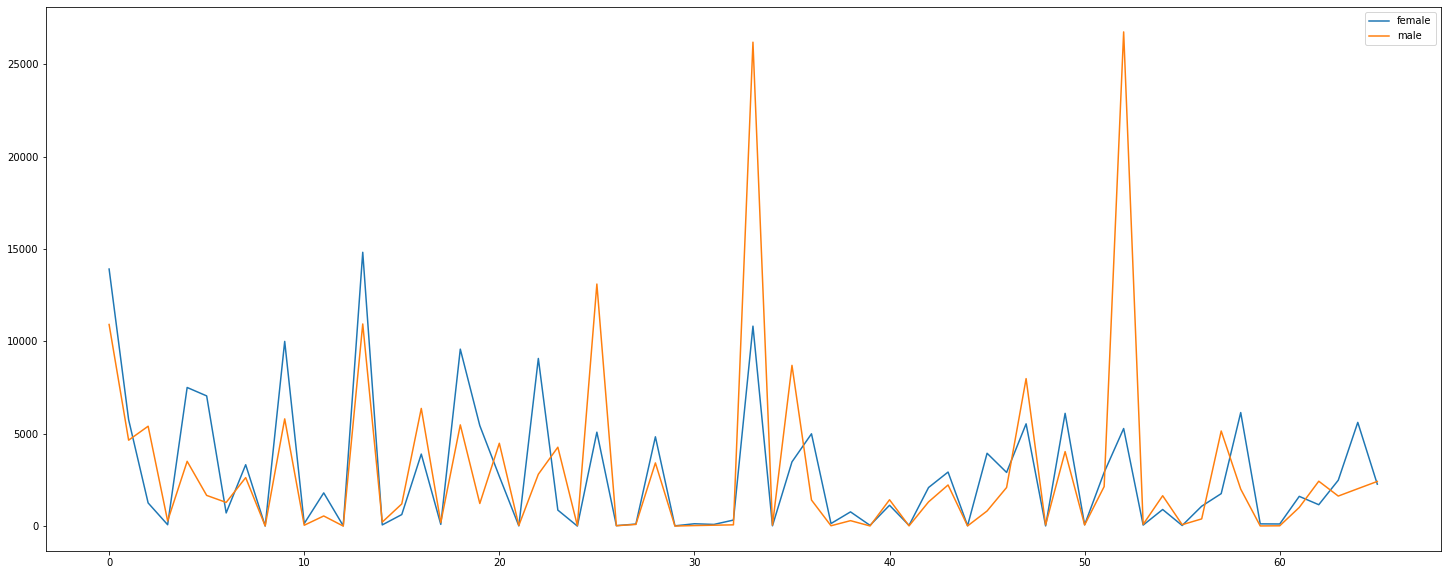

In [8]:
fig, ax = plt.subplots(figsize=(25,10))
total_student_course.plot(kind="line",y="female", ax=ax)
total_student_course.plot(kind="line",y="male", ax=ax)

Text(0.5, 0, 'Programme')

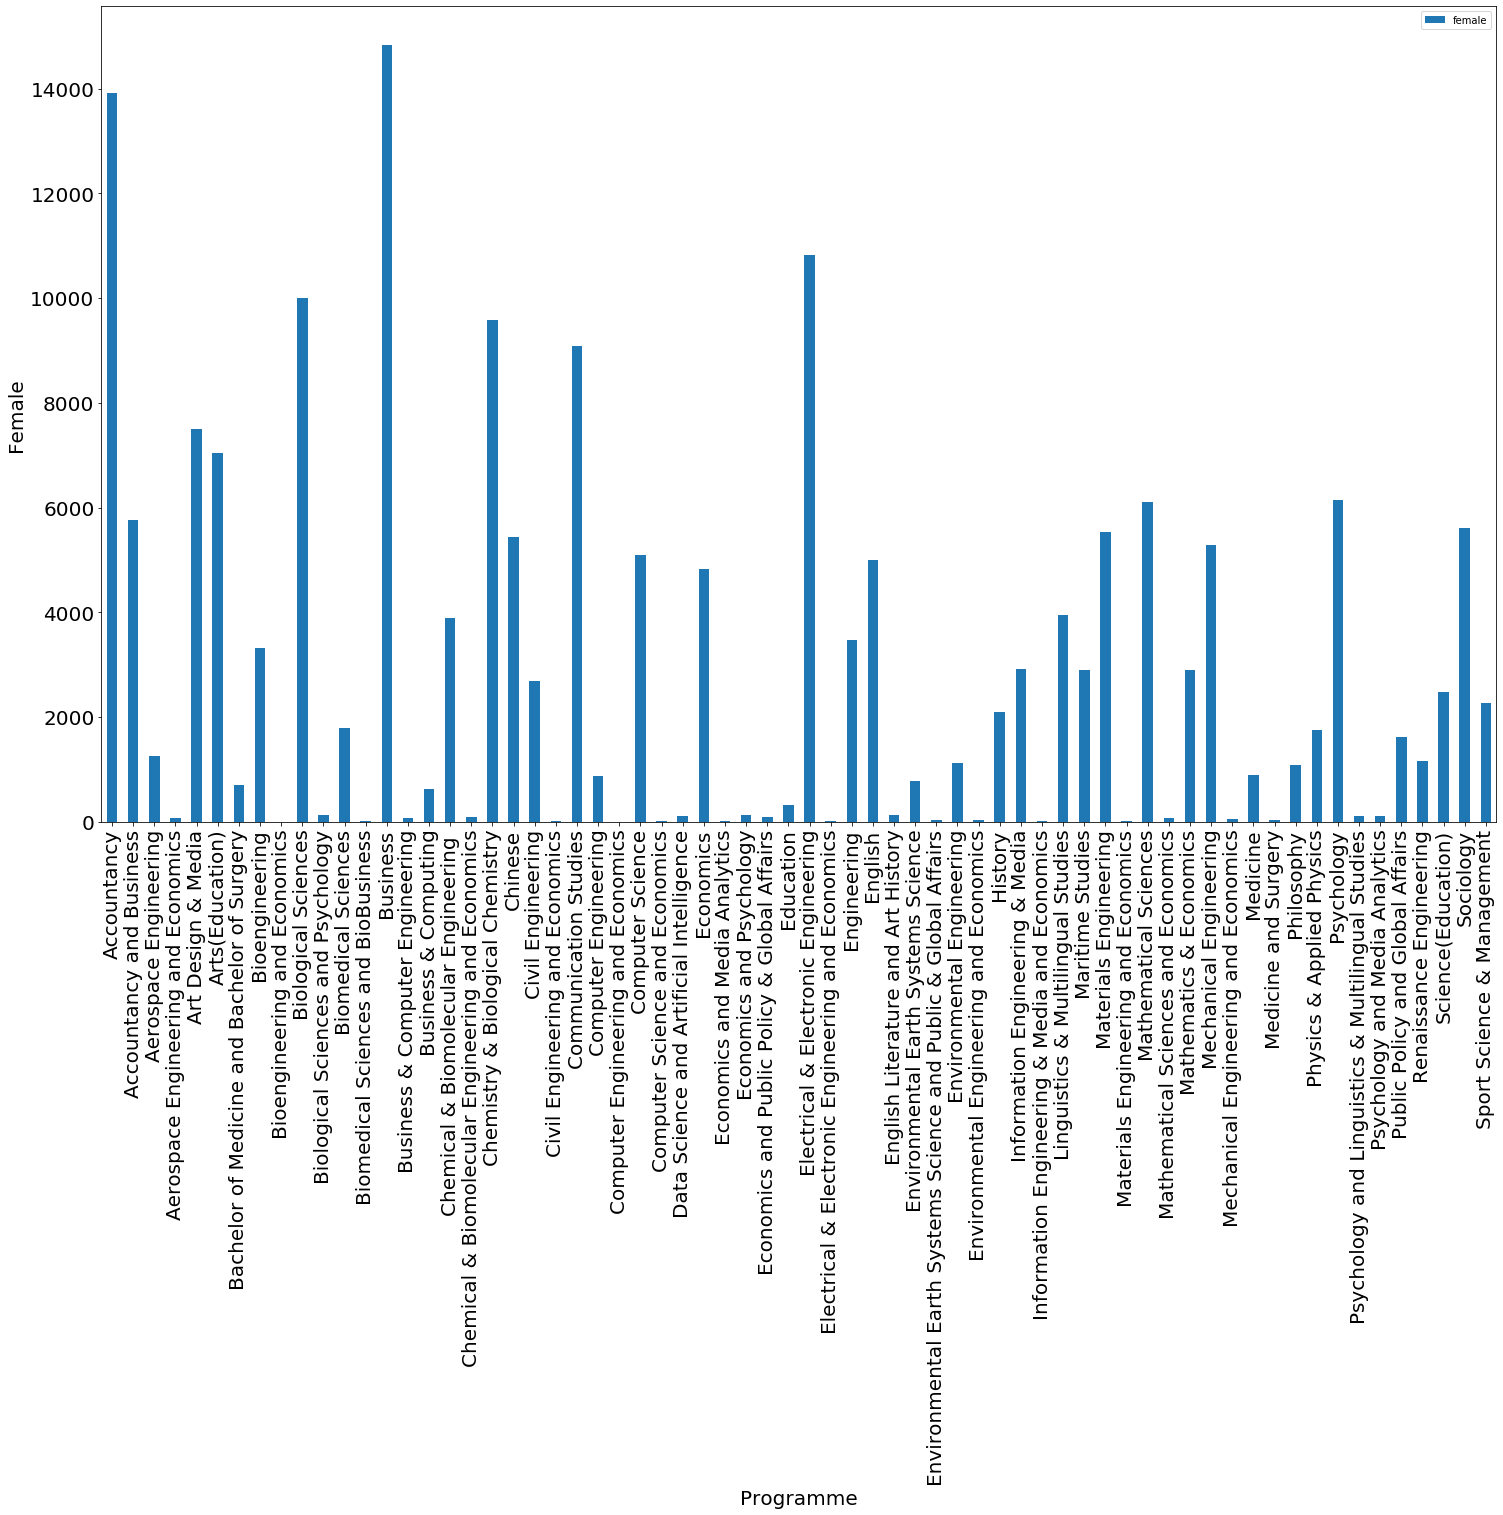

In [9]:
fig, ax = plt.subplots(figsize=(25, 15))
total_student_course.plot(kind="bar", x="programme", y="female", fontsize=20, ax=ax)
ax.set_ylabel("Female", fontsize=20)
ax.set_xlabel("Programme", fontsize=20)

<strong>From this graph, we can clearly see that throughout 2012 to 2019, Business course has always been a popular course to the female students followed by Accountancy.</strong>

Text(0.5, 0, 'Programme')

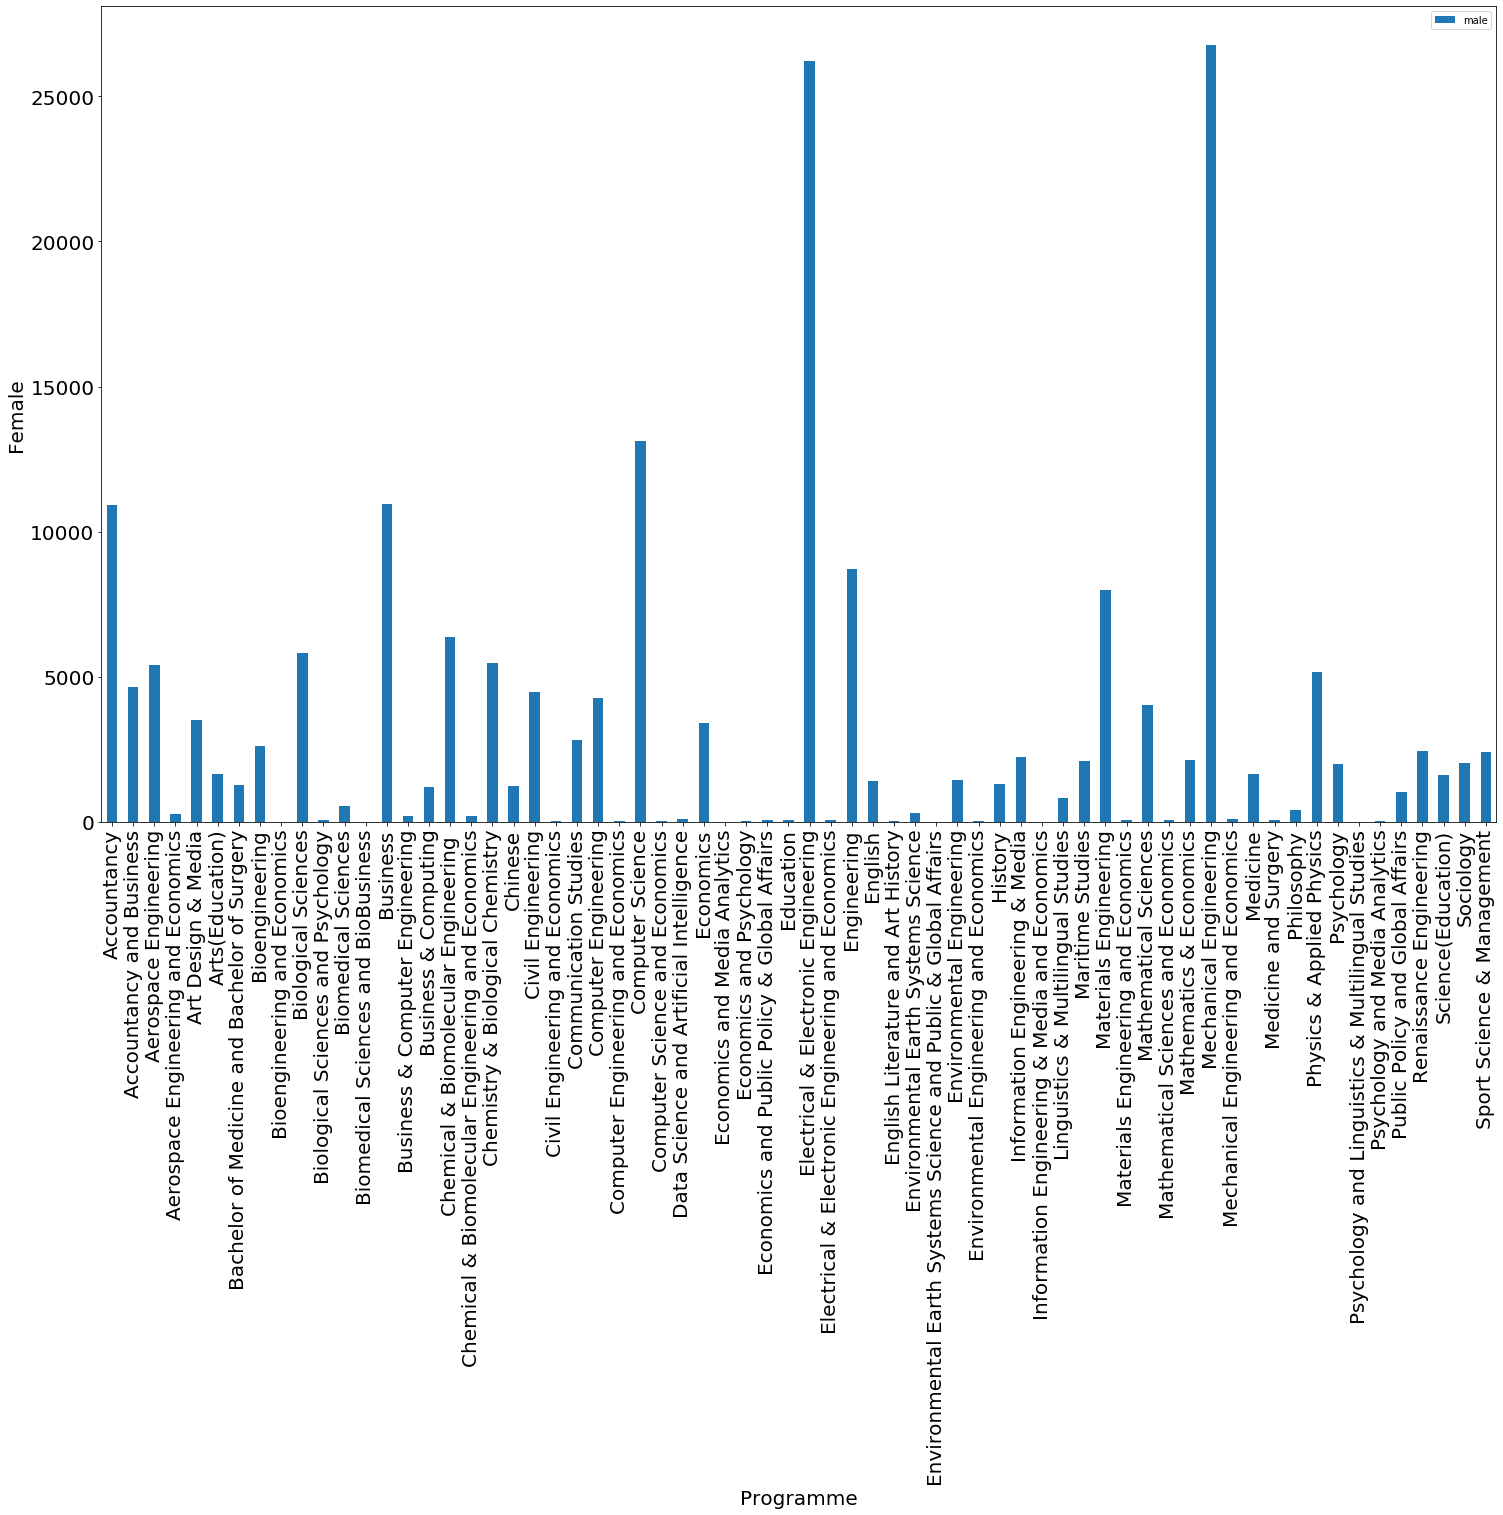

In [10]:
fig, ax = plt.subplots(figsize=(25, 15))
total_student_course.plot(kind="bar", x="programme", y="male", fontsize=20, ax=ax)
ax.set_ylabel("Female", fontsize=20)
ax.set_xlabel("Programme", fontsize=20)

<strong>Based on this graph, we can clearly see that Mechanical Engineering and Electrical & Electronic Engineering is very popular amongst the male students throughout 2012 - 2019. We forsee that this will continue as it is going on an upward trend.</strong>

### Visualising Male and Female Students per Year

[Text(0, 0.5, 'No. of Students'), Text(0.5, 1.0, 'No. of Students')]

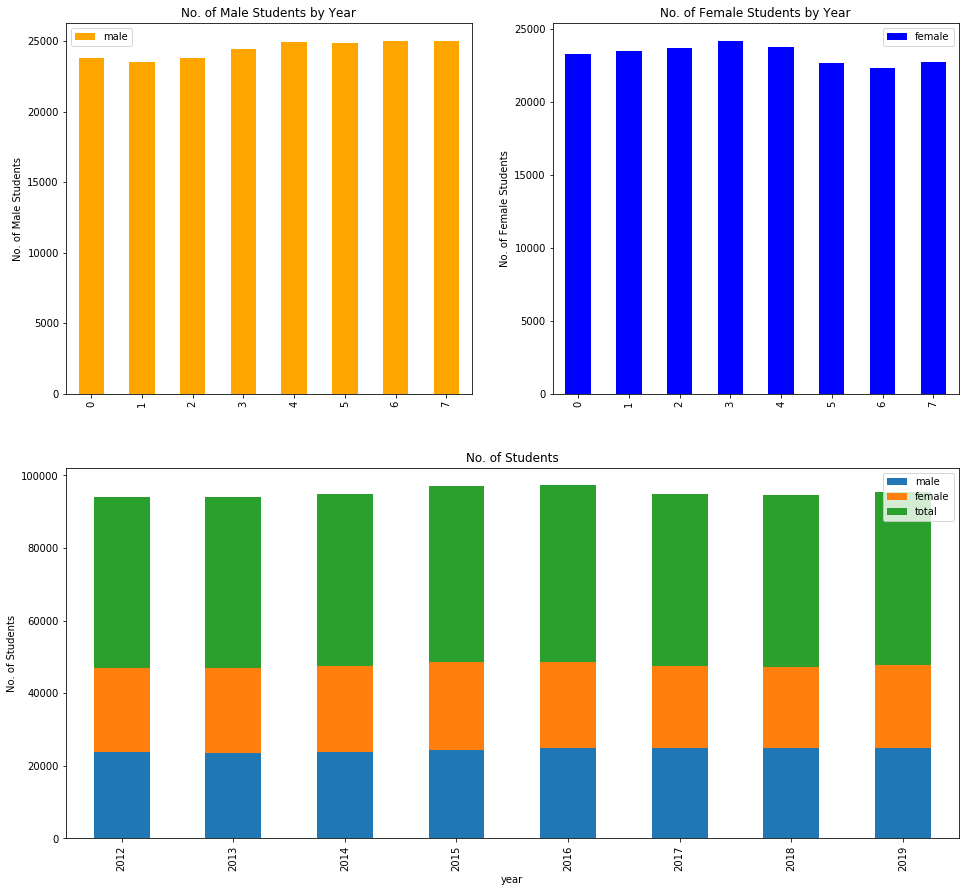

In [18]:
figure = plt.figure(figsize=(16,15))

ax1 = figure.add_subplot(2, 2, 1)
total_students_year.plot(kind='bar',
                           color='orange',
                           y='male',
                           ax = ax1)
ax1.set(ylabel='No. of Male Students', title='No. of Male Students by Year')

ax2 = figure.add_subplot(2, 2, 2)
total_students_year.plot(kind='bar',
                           color='blue',
                           y='female',
                           ax = ax2)
ax2.set(ylabel='No. of Female Students', title='No. of Female Students by Year')

ax3 = figure.add_subplot(2, 1, 2)
total_students_year.plot(kind='bar', stacked = True, x="year", ax = ax3)
ax3.set(ylabel='No. of Students', title='No. of Students')

### Linear Regression for Male Student

In [19]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

total_students = total_students_year[["year"]]

x_male, x_male_test, y_male, y_male_test = train_test_split(total_students, total_students_year["male"], random_state=0)

male_students_lr = linear_model.LinearRegression()
male_students_lr.fit(x_male, y_male)

print(male_students_lr.coef_)
print(male_students_lr.intercept_)

# We can see that every year, there is an increase in male student by 227.68.

[227.68]
-434433.7600000002


### Linear Regression for Female Student

In [20]:
x_female, x_female_test, y_female, y_female_test = train_test_split(total_students, total_students_year["female"], random_state=0)

female_students_lr = linear_model.LinearRegression()
female_students_lr.fit(x_female, y_female)

print(female_students_lr.coef_)
print(female_students_lr.intercept_)

# We can see that every year, female students are decreasing by 104.32 students

[-104.32]
233570.24


### Predicting Number of Male and Female Students

In [14]:
custom_year = [2023, 2024, 2025, 2026, 2027, 2028]

for i in custom_year:
    print("Male Student Prediction for Year {0}: {1}".format(i, male_students_lr.predict([[i]])))
    print("Female Student Prediction for Year {0}: {1} \n".format(i, female_students_lr.predict([[i]])))

Male Student Prediction for Year 2023: [26162.88]
Female Student Prediction for Year 2023: [22530.88] 

Male Student Prediction for Year 2024: [26390.56]
Female Student Prediction for Year 2024: [22426.56] 

Male Student Prediction for Year 2025: [26618.24]
Female Student Prediction for Year 2025: [22322.24] 

Male Student Prediction for Year 2026: [26845.92]
Female Student Prediction for Year 2026: [22217.92] 

Male Student Prediction for Year 2027: [27073.6]
Female Student Prediction for Year 2027: [22113.6] 

Male Student Prediction for Year 2028: [27301.28]
Female Student Prediction for Year 2028: [22009.28] 



### Assessing Performance of Model

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

fitted_male_values = male_students_lr.predict(x_male_test)
fitted_female_values = female_students_lr.predict(x_female_test)

print("Male R2Score: {0}".format(r2_score(y_male_test, fitted_male_values)))
print("Female R2Score: {0}\n".format(r2_score(y_female_test, fitted_female_values)))

print("Male Absolute Error: {0}".format(mean_absolute_error(y_male_test, fitted_male_values)))
print("Female Absolute Error: {0}\n".format(mean_absolute_error(y_female_test, fitted_female_values)))

print("Male Squared Error: {0}".format(mean_squared_error(y_male_test, fitted_male_values)))
print("Female Squared Error: {0}".format(mean_squared_error(y_female_test, fitted_female_values)))

Male R2Score: 0.8581952289058453
Female R2Score: 0.34081990756064084

Male Absolute Error: 167.64000000001397
Female Absolute Error: 462.3600000000006

Male Squared Error: 55038.54400000316
Female Squared Error: 296789.9039999895


### Select Optimal K - Elbow Plot


Text(0, 0.5, 'WSS')

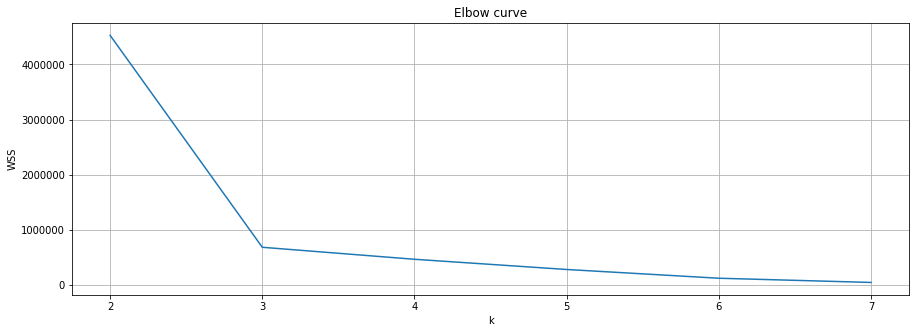

In [16]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = total_students_year
distorsions = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 8), distorsions)
plt.grid(True)
plt.title('Elbow curve')
plt.xlabel("k")
plt.ylabel("WSS")

### Conclusion

In conclusion, the project analysis has given us a better insight/outlook of the student population in NTU. However, the data retrieved may not be as reliable as initially presumed this is due to the possibility of students dropping out/changing course mid-semester, this can affect the integrity of the results obtained. As NTU is one among the six autonomous universities in Singapore, a further study to compare NTU’s student demographics and population with other autonomous universities should be done in order to find out the if peculiar disparities between gender demographics and population exist.